In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Nishant\Desktop\tasks and projects of data science\resume projects\fake news detection\news.csv")

In [3]:
df.head()

,Unnamed: 0,title,text,subject,date,class
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


# data preprocessing

In [4]:
df.shape

(44919, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44919 entries, 0 to 44918
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44919 non-null  int64 
 1   title       44919 non-null  object
 2   text        44919 non-null  object
 3   subject     44898 non-null  object
 4   date        44898 non-null  object
 5   class       44919 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.1+ MB


In [6]:
df = df.drop(['title','subject','date'],axis=1)

In [7]:
df.head()

,Unnamed: 0,text,class
0,0,Donald Trump just couldn t wish all Americans ...,0
1,1,House Intelligence Committee Chairman Devin Nu...,0
2,2,"On Friday, it was revealed that former Milwauk...",0
3,3,"On Christmas day, Donald Trump announced that ...",0
4,4,Pope Francis used his annual Christmas Day mes...,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44919 entries, 0 to 44918
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44919 non-null  int64 
 1   text        44919 non-null  object
 2   class       44919 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


In [9]:
df.shape

(44919, 3)

In [10]:
df.isnull().sum()

Unnamed: 0    0
text          0
class         0
dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

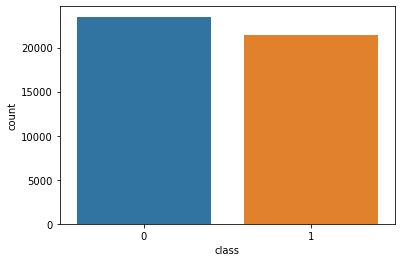

In [11]:
sns.countplot(x=df['class'],data=df)

In [12]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import re
pst = PorterStemmer()

In [13]:
cleaned_data =[]
for i in range(0,44919):
    Text = re.sub('[^a-zA-z0-9]',' ',df['text'][i])
    Text = Text.lower()
    Text = Text.split()
    Text = [pst.stem(word) for word in Text if word not in (stopwords.words('english'))]
    Text = ' '.join(Text)
    cleaned_data.append(Text)

In [14]:
df['cleaned'] = cleaned_data

In [15]:
df.head()

,Unnamed: 0,text,class,cleaned
0,0,Donald Trump just couldn t wish all Americans ...,0,donald trump wish american happi new year leav...
1,1,House Intelligence Committee Chairman Devin Nu...,0,hous intellig committe chairman devin nune go ...
2,2,"On Friday, it was revealed that former Milwauk...",0,friday reveal former milwauke sheriff david cl...
3,3,"On Christmas day, Donald Trump announced that ...",0,christma day donald trump announc would back w...
4,4,Pope Francis used his annual Christmas Day mes...,0,pope franci use annual christma day messag reb...


In [16]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [17]:
df.drop(['text'],axis=1)

,class,cleaned
0,0,donald trump wish american happi new year leav...
1,0,hous intellig committe chairman devin nune go ...
2,0,friday reveal former milwauke sheriff david cl...
3,0,christma day donald trump announc would back w...
4,0,pope franci use annual christma day messag reb...
...,...,...
44914,1,brussel reuter nato alli tuesday welcom presid...
44915,1,london reuter lexisnexi provid legal regulator...
44916,1,minsk reuter shadow disus soviet era factori m...
44917,1,moscow reuter vatican secretari state cardin p...


# as we cleaned the data so plot wordcloud for text groupby class
# real news is 1 and fake news is 0

In [18]:
real_news = ' '.join(word for word in df['cleaned'][df['class']==1].astype(str))

In [19]:
wordcloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False).generate(real_news)

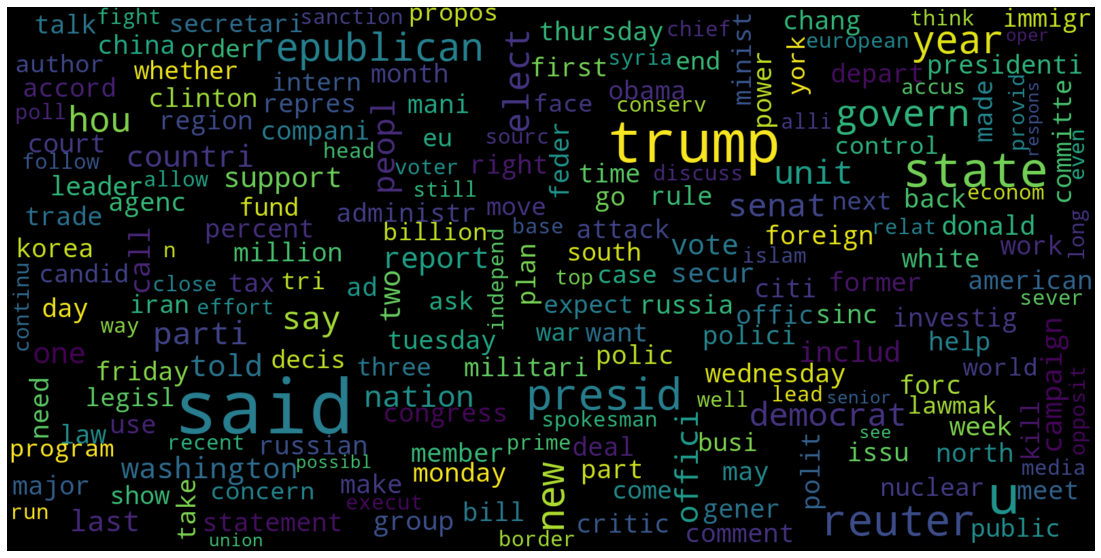

In [20]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud ,interpolation='bilinear')
plt.axis('off')
plt.show()

wordcloud for news which is not fake

In [21]:
fake_news = ' '.join(word for word in df['cleaned'][df['class']==0].astype(str))

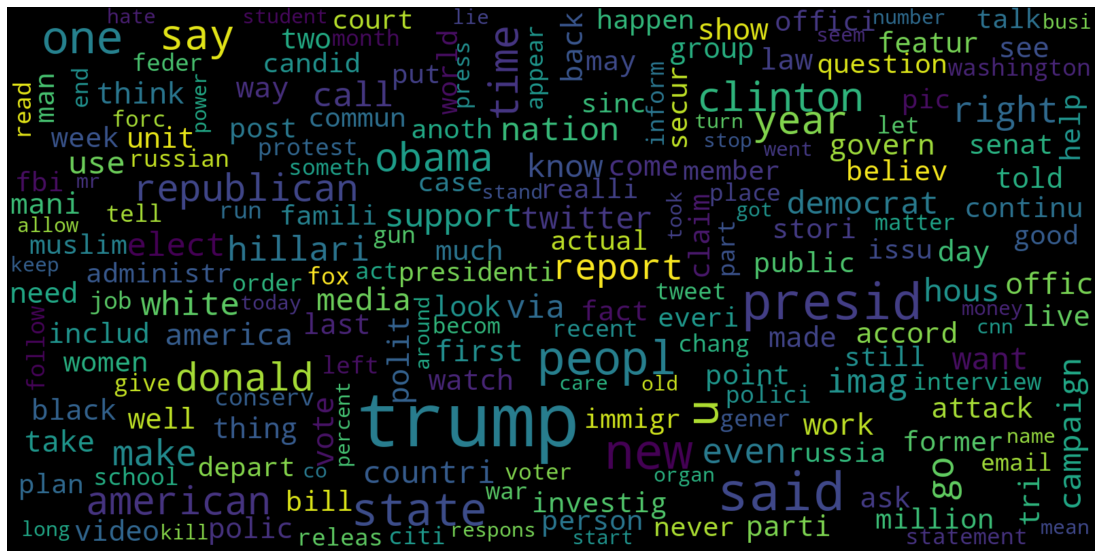

In [22]:
wordcloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False).generate(fake_news)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud ,interpolation='bilinear')
plt.axis('off')
plt.show()

# lets plot top 20 frequent words in fake news

In [23]:
word_tokenize

<function nltk.tokenize.word_tokenize(text, language='english', preserve_line=False)>

In [24]:
from nltk import ngrams, bigrams, trigrams

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['cleaned'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

In [26]:
df1.head()

,Review,count
0,trump,134241
1,said,132780
2,state,63248
3,presid,60404
4,would,55162


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'trump'),
  Text(1, 0, 'said'),
  Text(2, 0, 'state'),
  Text(3, 0, 'presid'),
  Text(4, 0, 'would'),
  Text(5, 0, 'peopl'),
  Text(6, 0, 'year'),
  Text(7, 0, 'republican'),
  Text(8, 0, 'one'),
  Text(9, 0, 'say'),
  Text(10, 0, 'elect'),
  Text(11, 0, 'also'),
  Text(12, 0, 'new'),
  Text(13, 0, 'govern'),
  Text(14, 0, 'like'),
  Text(15, 0, 'hous'),
  Text(16, 0, 'time'),
  Text(17, 0, 'report'),
  Text(18, 0, 'reuter'),
  Text(19, 0, 'clinton')])

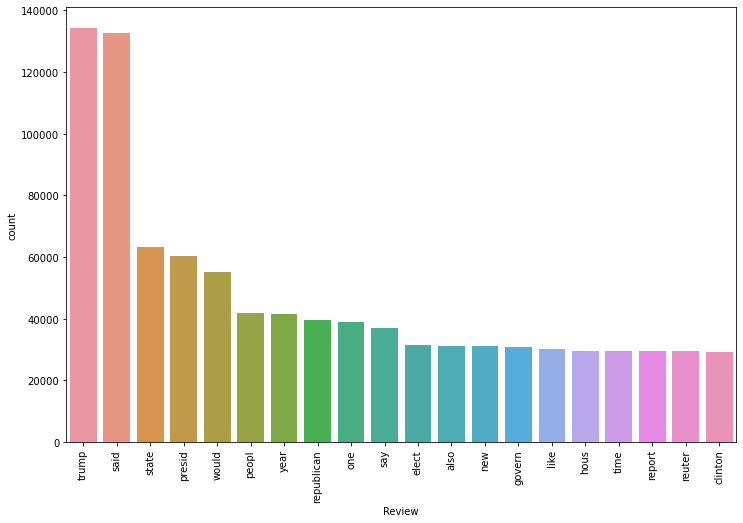

In [27]:
plt.figure(figsize=(12,8))
sns.barplot(x=df1['Review'], y=df1['count'], data=df1)
plt.xticks(rotation=90)

In [30]:
map={0:'FAKE',1:'REAL'}
df['class'] = df['class'].map(map)

# Converting text into Vectors

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['cleaned'], df['class'], test_size=0.20, random_state=0)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer()
x_train = vector.fit_transform(x_train)
x_test = vector.transform(x_test)

# Model training, Evaluation, and Prediction

# logistic regression

In [35]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression()

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [37]:
y_pred = logit.predict(x_test)

In [38]:
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[4652   38]
 [  76 4218]]


In [39]:
ac = accuracy_score(y_pred,y_test)
print(ac)

0.9873107747105966


In [40]:
bias = logit.score(x_train,y_train)
bias

0.990788924446918

In [41]:
variance = logit.score(x_test,y_test)
variance

0.9873107747105966

# Decision tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier()
dtr.fit(x_train, y_train)

DecisionTreeClassifier()

In [43]:
y_pred_dtr = dtr.predict(x_test)

In [44]:
cm_dtr = confusion_matrix(y_pred_dtr,y_test)
cm_dtr

array([[4707,   25],
       [  21, 4231]], dtype=int64)

In [45]:
ac_dtr = accuracy_score(y_pred_dtr,y_test)
ac_dtr

0.994879786286732

In [46]:
bias_dtr = dtr.score(x_train,y_train)
bias_dtr

0.999972171977181

In [47]:
variance_dtr = dtr.score(x_test,y_test)
variance_dtr

0.994879786286732

In [48]:
confusion_matrix(y_pred, y_test , labels=['FAKE','REAL'])

array([[4652,   38],
       [  76, 4218]], dtype=int64)